<a href="https://colab.research.google.com/github/22091397037MaharaniSekarHapsari/Campaign-Analysis/blob/main/Campaign%20Payment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleansing Data master trx campaign

In [ ]:
# adalah sebuah library yang digunakan untuk mengolah data
import pandas as pd
pd.set_option("display.max_columns",None) #untuk menampilkan semua kolom pada data

import numpy as np

In [ ]:
df = pd.read_csv("/content/master_trx_campaign.csv")

df.head()

<ipython-input-3-34c83eeae7ea>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/master_trx_campaign.csv")


,campaign_id,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt
0,901,1356,Other,"February 25, 2024, 00:00",NaN,F,NaN,NaN,40000.0,5302326,1
1,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717349,1
2,902,1308,Other,"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4917609,1
3,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717429,1
4,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:02",NaN,M,NaN,NaN,40000.0,4717437,1


In [ ]:
# cek jumlah data kosong
df.isna().sum()

,0
campaign_id,0
merchant_name,0
merchant_category_name,0
transactions_datetime,0
cust_age,81415
gender,526
city,147524
job,141157
paid_amount,0
customer_name,0


In [ ]:
# Cek duplikat
print(df.duplicated().sum())

0


In [ ]:
# Hapus duplikasi
df = df.drop_duplicates()

In [ ]:
# Cek duplikat
print(df.duplicated().sum())

0


In [ ]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153788 entries, 0 to 153787
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   campaign_id             153788 non-null  int64  
 1   merchant_name           153788 non-null  int64  
 2   merchant_category_name  153788 non-null  object 
 3   transactions_datetime   153788 non-null  object 
 4   cust_age                72373 non-null   object 
 5   gender                  153262 non-null  object 
 6   city                    6264 non-null    object 
 7   job                     12631 non-null   object 
 8   paid_amount             153788 non-null  float64
 9   customer_name           153788 non-null  int64  
 10  tpt                     153788 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.9+ MB


In [ ]:
# mengubah tipe data date
df['transactions_datetime'] = pd.to_datetime(df['transactions_datetime'])

In [ ]:

# Menambahkan kolom baru 'Customer_Status' berdasarkan kondisi kolom city, job, dan age
df['Customer_Status'] = df.apply(
    lambda row: 'KYC' if all([pd.notna(row['city']), row['city'] != '',
                              pd.notna(row['job']), row['job'] != '',
                              pd.notna(row['cust_age'])])
    else 'Non-KYC', axis=1
)

print(df)

        campaign_id  merchant_name             merchant_category_name  \
0               901           1356                              Other   
1               903            848  Retail (Not Elsewhere Classified)   
2               902           1308                              Other   
3               903            848  Retail (Not Elsewhere Classified)   
4               903            848  Retail (Not Elsewhere Classified)   
...             ...            ...                                ...   
153783          200           1237                              Other   
153784          200           1237                              Other   
153785          200           1237                              Other   
153786          200           1237                              Other   
153787          200           1237                              Other   

       transactions_datetime cust_age gender              city  \
0        2024-02-25 00:00:00      NaN      F             

In [ ]:
 import pandas as pd

# Mengisi nilai kosong di kolom gender, city, job dengan 'Tidak Diketahui'
df['gender'] = df['gender'].fillna('Tidak Diketahui')
df['city'] = df['city'].fillna('Tidak Diketahui')
df['job'] = df['job'].fillna('Tidak Diketahui')
df['cust_age'] = df['cust_age'].fillna('Tidak Diketahui')

In [ ]:
# cek jumlah data kosong
df.isna().sum()

,0
campaign_id,0
merchant_name,0
merchant_category_name,0
transactions_datetime,0
cust_age,0
gender,0
city,0
job,0
paid_amount,0
customer_name,0


In [ ]:
# Filter data antara tahun 2021 hingga 2024
filtered_df = df[(df['transactions_datetime'].dt.year >= 2021) & (df['transactions_datetime'].dt.year <= 2024)]

print(filtered_df)

        campaign_id  merchant_name             merchant_category_name  \
0               901           1356                              Other   
1               903            848  Retail (Not Elsewhere Classified)   
2               902           1308                              Other   
3               903            848  Retail (Not Elsewhere Classified)   
4               903            848  Retail (Not Elsewhere Classified)   
...             ...            ...                                ...   
152639          900           4658                              Other   
152640          900           4658                              Other   
152641          900           4658                              Other   
152642          900           4658                              Other   
152643          900           4658                              Other   

       transactions_datetime         cust_age gender             city  \
0        2024-02-25 00:00:00  Tidak Diketahui     

In [ ]:
# menampilkan data yang sudah di filter menggunakan format tampilan awal
filtered_df.reset_index(drop=True)

,campaign_id,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt,Customer_Status
0,901,1356,Other,2024-02-25 00:00:00,Tidak Diketahui,F,Tidak Diketahui,Tidak Diketahui,40000.0,5302326,1,Non-KYC
1,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,Tidak Diketahui,M,Tidak Diketahui,Tidak Diketahui,40000.0,4717349,1,Non-KYC
2,902,1308,Other,2024-02-25 00:01:00,Tidak Diketahui,M,Tidak Diketahui,Tidak Diketahui,40000.0,4917609,1,Non-KYC
3,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,Tidak Diketahui,M,Tidak Diketahui,Tidak Diketahui,40000.0,4717429,1,Non-KYC
4,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:02:00,Tidak Diketahui,M,Tidak Diketahui,Tidak Diketahui,40000.0,4717437,1,Non-KYC
...,...,...,...,...,...,...,...,...,...,...,...,...
108618,900,4658,Other,2024-02-26 21:57:00,Tidak Diketahui,F,Tidak Diketahui,Tidak Diketahui,92750.0,4546645,1,Non-KYC
108619,900,4658,Other,2024-02-26 22:01:00,Tidak Diketahui,M,Tidak Diketahui,Tidak Diketahui,92750.0,4547268,1,Non-KYC
108620,900,4658,Other,2024-02-26 22:01:00,Tidak Diketahui,M,Tidak Diketahui,Tidak Diketahui,92750.0,4547528,1,Non-KYC
108621,900,4658,Other,2024-02-26 22:02:00,Tidak Diketahui,F,Tidak Diketahui,Tidak Diketahui,92750.0,4547171,1,Non-KYC


In [ ]:
# Simpan data yang sudah dibersihkan
filtered_df.to_csv('master_trx_campaign_cleansing.csv', index=False)  # Menyimpan ke file filter CSV


# Cleansing data master campaign

In [ ]:
import pandas as pd
pd.set_option("display.max_columns",None)

import numpy as np
df = pd.read_csv("/content/master_campaign.csv")

df.head()

,Campaign ID,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,"February 7, 2019, 00:00","February 28, 2019, 23:59",21 days
1,96,SUKA ERAFONE,SUKADOKU,16,50,"May 30, 2016, 00:00","June 5, 2016, 23:59",6 days
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,"May 17, 2019, 00:00","May 19, 2019, 23:59",2 days
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,"May 25, 2019, 00:00","June 10, 2019, 23:59",16 days
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,"1,000","June 21, 2023, 00:00","June 30, 2023, 23:59",9 days


In [ ]:
# cek jumlah data kosong
df.isna().sum()

,0
Campaign ID,0
Campaign Name,0
Campaign Code,1
Code Used,0
Code Quota,0
Campaign Start Date,0
Campaign End Date,0
Promo Duration,0


In [ ]:
 import pandas as pd

# Mengisi nilai kosong di kolom campaign code dengan 'Tidak Diketahui'
df['Campaign Code'] = df['Campaign Code'].fillna('Tidak Diketahui')

In [ ]:
# cek jumlah data kosong
df.isna().sum()

,0
Campaign ID,0
Campaign Name,0
Campaign Code,0
Code Used,0
Code Quota,0
Campaign Start Date,0
Campaign End Date,0
Promo Duration,0


In [ ]:
# Cek duplikat
print(df.duplicated().sum())

0


In [ ]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign ID          819 non-null    int64 
 1   Campaign Name        819 non-null    object
 2   Campaign Code        819 non-null    object
 3   Code Used            819 non-null    object
 4   Code Quota           819 non-null    object
 5   Campaign Start Date  819 non-null    object
 6   Campaign End Date    819 non-null    object
 7   Promo Duration       819 non-null    object
dtypes: int64(1), object(7)
memory usage: 51.3+ KB


In [ ]:
import pandas as pd

# Membersihkan format angka untuk kolom 'Code Used' dan 'Code Quota' dengan menghapus koma
df['Code Used'] = df['Code Used'].str.replace(',', '').astype(int)
df['Code Quota'] = df['Code Quota'].str.replace(',', '').astype(int)

# Mengubah 'Campaign Start Date' dan 'Campaign End Date' ke tipe datetime
df['Campaign Start Date'] = pd.to_datetime(df['Campaign Start Date'], errors='coerce')
df['Campaign End Date'] = pd.to_datetime(df['Campaign End Date'], errors='coerce')

In [ ]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign ID          819 non-null    int64         
 1   Campaign Name        819 non-null    object        
 2   Campaign Code        819 non-null    object        
 3   Code Used            819 non-null    int64         
 4   Code Quota           819 non-null    int64         
 5   Campaign Start Date  818 non-null    datetime64[ns]
 6   Campaign End Date    818 non-null    datetime64[ns]
 7   Promo Duration       819 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 51.3+ KB


In [ ]:
#Filter data 2021-2024
filtered_df = df[
    (df['Campaign Start Date'].dt.year >= 2021) &
    (df['Campaign Start Date'].dt.year <= 2024) &
    (df['Campaign End Date'].dt.year >= 2021) &
    (df['Campaign End Date'].dt.year <= 2024)
]

print(filtered_df)


     Campaign ID          Campaign Name          Campaign Code  Code Used  \
4            854       Saatnya Ragnarok           ROODOKUNIPIN        144   
5            825                  CEBAN       TAGIHANCEBANFEB2       1488   
11           718           testinhceban            testceban20          0   
16           764  TESTCAMPAIGNCEBAN1234  TESTCAMPAIGNCEBAN1234          1   
23           740                  CEBAN          CEBANGAMESDEC         51   
..           ...                    ...                    ...        ...   
796          713                  CEBAN            DOKUGOCEBAN          0   
803          734                  CEBAN        CEBANTAGIHANOCT        666   
806          725                  CEBAN           CEBANGAMES99        750   
810          792             PROKLAMASI         DOKUPROKLAMASI          1   
811          868                  CEBAN             CEBANSEP09       1479   

     Code Quota Campaign Start Date   Campaign End Date Promo Duration  
4 

In [ ]:
print(filtered_df[['Campaign Start Date', 'Campaign End Date']].head())


   Campaign Start Date   Campaign End Date
4           2023-06-21 2023-06-30 23:59:00
5           2023-01-25 2023-02-10 23:59:00
11          2021-08-25 2021-08-26 23:59:00
16          2022-01-24 2022-01-25 23:59:00
23          2021-11-25 2021-12-10 23:59:00


In [ ]:
# Simpan data yang sudah dibersihkan
filtered_df.to_csv("master_campaign_cleansing.csv", index=False)

# *EDA*



Statistik Deskriptif Kolom Numerik:
         campaign_id  merchant_name   paid_amount  customer_name       tpt  \
count  108594.000000  108594.000000  1.085940e+05   1.085940e+05  108594.0   
mean      841.304823    2469.154603  6.930176e+04   4.429558e+06       1.0   
std        65.654639    2027.577900  4.963222e+04   8.013052e+05       0.0   
min       676.000000     207.000000  2.000000e+03   6.430000e+02       1.0   
25%       806.000000     848.000000  4.000000e+04   4.238948e+06       1.0   
50%       851.000000    1356.000000  4.275000e+04   4.546576e+06       1.0   
75%       896.000000    4658.000000  9.275000e+04   4.817580e+06       1.0   
max       938.000000   44603.000000  2.093459e+06   6.074317e+06       1.0   

         Campaign ID      Code Used     Code Quota  
count  108594.000000  108594.000000  108594.000000  
mean      841.304823    1155.362589    1207.387609  
std        65.654639     407.945967     382.171128  
min       676.000000       1.000000     100.0000

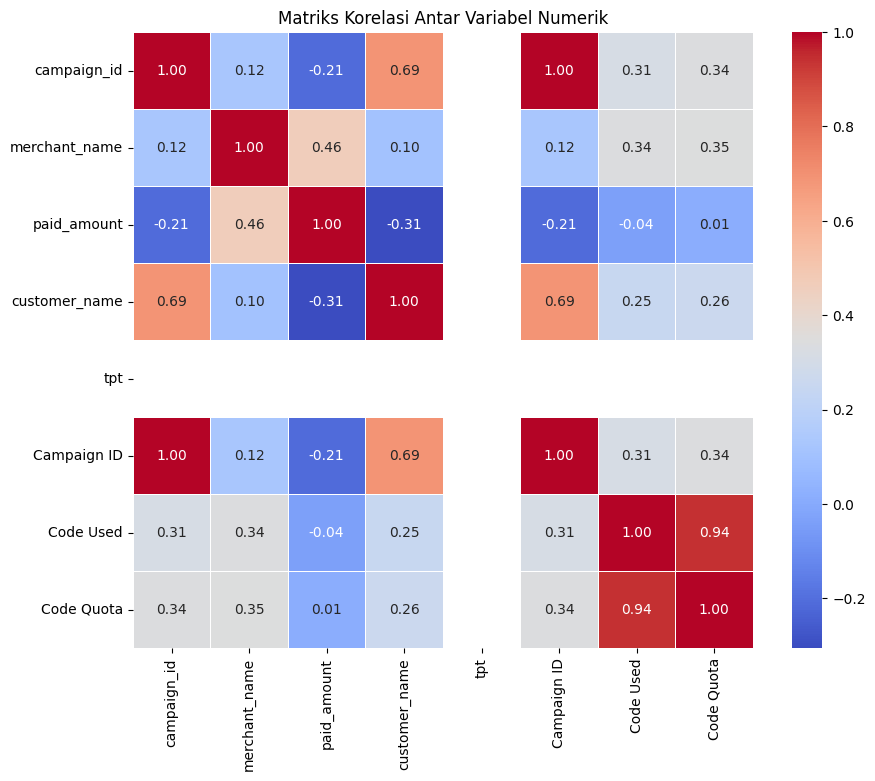

<ipython-input-42-6cd792d7a183>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='merchant_category_name', palette='Set2',


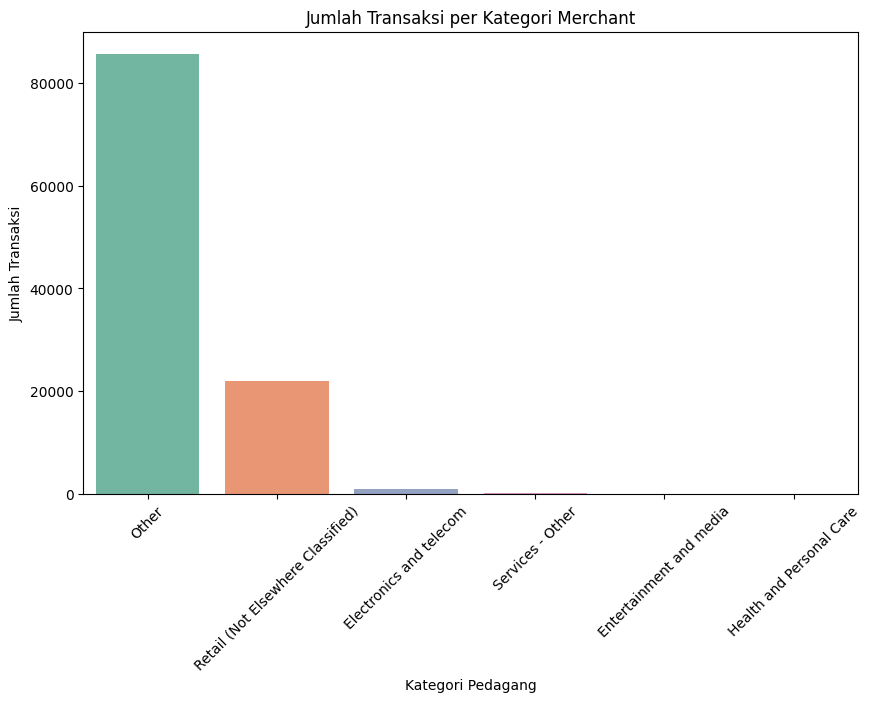

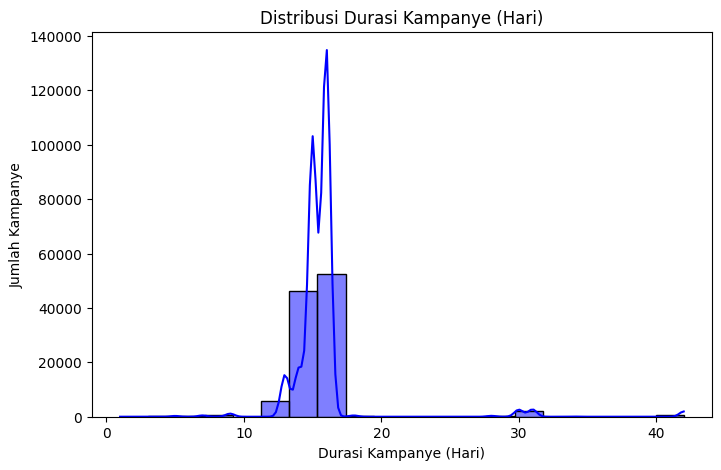

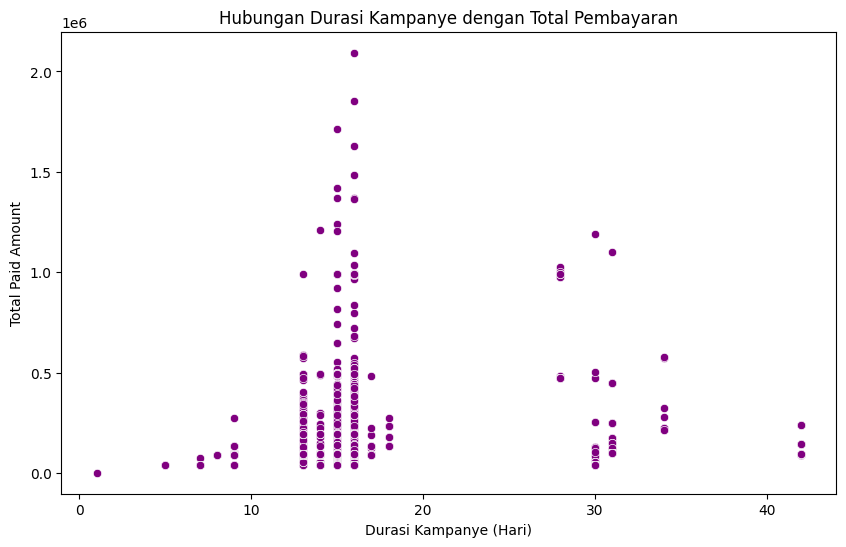

<ipython-input-42-6cd792d7a183>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Month', palette='viridis')


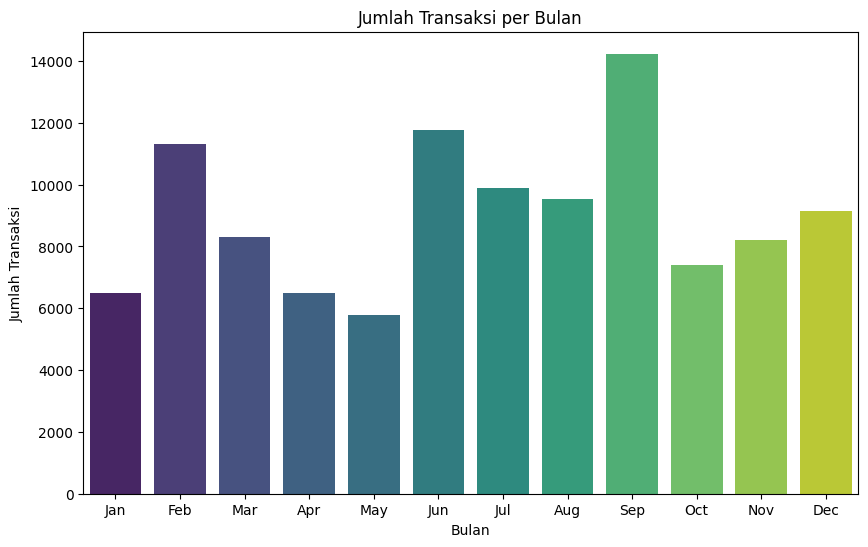

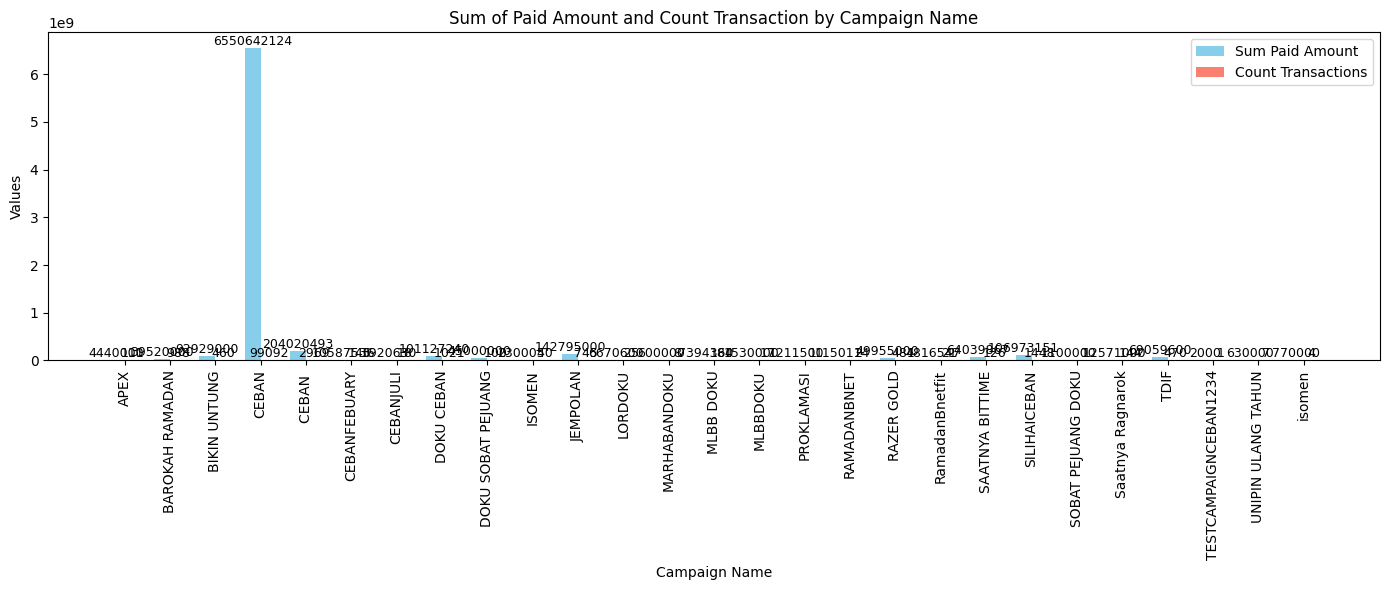

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
campaign_df = pd.read_csv('master_campaign_cleansing.csv')
transaction_df = pd.read_csv('master_trx_campaign_cleansing.csv')

# Menggabungkan dataset berdasarkan campaign_id
merged_df = pd.merge(transaction_df, campaign_df, how='inner', left_on='campaign_id', right_on='Campaign ID')

# 1. Analisis Deskriptif
print("\nStatistik Deskriptif Kolom Numerik:")
print(merged_df.describe())

print("\nDistribusi Data Gender:")
print(merged_df['gender'].value_counts())


#2. Analisis Korelasi
# Memilih hanya kolom numerik
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_columns.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()



# 3. Analisis Transaksi Kategori Merchant
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='merchant_category_name', palette='Set2',
              order=merged_df['merchant_category_name'].value_counts().index)
plt.title("Jumlah Transaksi per Kategori Merchant")
plt.ylabel("Jumlah Transaksi")
plt.xlabel("Kategori Pedagang")
plt.xticks(rotation=45)
plt.show()


# 4. Distribusi Durasi Kampanye
merged_df['Campaign Duration (Days)'] = (
    pd.to_datetime(merged_df['Campaign End Date']) - pd.to_datetime(merged_df['Campaign Start Date'])
).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x='Campaign Duration (Days)', bins=20, kde=True, color='blue')
plt.title("Distribusi Durasi Kampanye (Hari)")
plt.xlabel("Durasi Kampanye (Hari)")
plt.ylabel("Jumlah Kampanye")
plt.show()


# 5. Hubungan Durasi Kampanye dengan Total Pembayaran
merged_df['Campaign Start Date'] = pd.to_datetime(merged_df['Campaign Start Date'], errors='coerce')
merged_df['Campaign End Date'] = pd.to_datetime(merged_df['Campaign End Date'], errors='coerce')

merged_df['Campaign Duration (Days)'] = (
    merged_df['Campaign End Date'] - merged_df['Campaign Start Date']
).dt.days

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Campaign Duration (Days)', y='paid_amount', color='purple')
plt.title("Hubungan Durasi Kampanye dengan Total Pembayaran")
plt.xlabel("Durasi Kampanye (Hari)")
plt.ylabel("Total Paid Amount")
plt.show()


# 6. Jumlah Transaksi Per Bulan

merged_df['Campaign Start Date'] = pd.to_datetime(merged_df['Campaign Start Date'])
merged_df['Month'] = merged_df['Campaign Start Date'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Month', palette='viridis')
plt.title("Jumlah Transaksi per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# 7. Total Paid Amount dengan Jumlah Transaksi Berdasarkan Kampanye
# Hitung sum dan count berdasarkan campaign_name
sum_data = merged_df.groupby('Campaign Name')['paid_amount'].sum()
count_data = merged_df['Campaign Name'].value_counts()

# Menggabungkan sum dan count ke dalam satu DataFrame
summary_df = pd.DataFrame({
    'Sum Paid Amount': sum_data,
    'Count Transactions': count_data
}).reset_index()

# Plot grouped bar chart
x = np.arange(len(summary_df['Campaign Name']))  # Lokasi x untuk setiap kategori
width = 0.35  # Lebar batang

fig, ax = plt.subplots(figsize=(14, 6))

# Plot batang untuk sum dan count
bar1 = ax.bar(x - width/2, summary_df['Sum Paid Amount'], width, label='Sum Paid Amount', color='skyblue')
bar2 = ax.bar(x + width/2, summary_df['Count Transactions'], width, label='Count Transactions', color='salmon')

# Menambahkan detail pada grafik
ax.set_xlabel('Campaign Name')
ax.set_ylabel('Values')
ax.set_title('Sum of Paid Amount and Count Transaction by Campaign Name')
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Campaign Name'], rotation=90)
ax.legend()

# Menampilkan nilai di atas setiap batang
for bar in bar1 + bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.0f}', ha='center', va='bottom', fontsize=9)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()




